# Intro

This is a simple exploration and explanation of what camelot can do in terms of PDF parsing, and post-processing stage of an OCR pipeline. 

One unique feature from camelot which is different from other tools is, the user is able to tweak the table detection algorithm based on metrics like accuracy and whitespaces. 

---



*   Stream method - is used to work with tables which have whitepaces which simulates table structure, rather than actual table lines. In this case, each character is grouped into words, and words into table lines with the help of margins. 
*   Lattice method - is used to parse tables which have demarcated lines of cells which clearly shows the table structure. Therefore, it is not based on guesses to decide on the rows or cells. It uses ghostscript (in this H2O.ai version, it doesn't) to convert PDFs into images. Then processes horizontal and vertical lines of tables (their and and or relationships to define table/cell boundaries). Line intersections are defined by "and"ing, table boundaries are defined by "or"ing pixel intensities. 



---



# Installation

In [ ]:
!git clone https://www.github.com/h2oai/camelot

Cloning into 'camelot'...
remote: Enumerating objects: 3812, done.
remote: Counting objects: 100% (3812/3812), done.
remote: Compressing objects: 100% (1257/1257), done.
remote: Total 3812 (delta 2497), reused 3792 (delta 2485), pack-reused 0
Receiving objects: 100% (3812/3812), 16.35 MiB | 33.03 MiB/s, done.
Resolving deltas: 100% (2497/2497), done.


In [ ]:
cd camelot

/content/camelot


In [ ]:
!pip install "camelot-py[base]"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 40 kB 28 kB/s 
     |████████████████████████████████| 5.6 MB 7.9 MB/s 
     |████████████████████████████████| 220 kB 57.9 MB/s 
     |████████████████████████████████| 11.7 MB 18.5 MB/s 
     |████████████████████████████████| 4.0 MB 43.7 MB/s 


In [ ]:
from google.colab import files
files.upload()

## Dependencies installation

In [ ]:
!pip install pdf2image
!pip install python-dateutil
!apt-get install poppler-utils 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 20 not upgraded.
Need to get 154 kB of archives.
After this operation, 613 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 poppler-utils amd64 0.62.0-2ubuntu2.14 [154 kB]
Fetched 154 kB in 1s (280 kB/s)
Selecting previously unselected package poppler-utils.
(Reading database ... 159447 files and directories currently installed.)
Preparing to unpack .../poppler-utils_0.62.0-2ubuntu2.14_amd64.deb ...
U

## Import the library

In [ ]:
import camelot

## Testing on an example PDF

In [ ]:
tables = camelot.read_pdf('/content/camelot/background_lines.pdf', process_background=True)
tables[1].df

,0,1,2,3,4,5,6,7
0,State,Date,Halt \nstations,Halt \ndays,Persons \ndirectly \nreached\n(in lakh),Persons \ntrained,Persons \ncounseled,Persons \ntested\nfor HIV
1,Delhi,1.12.2009,8,17,1.29,"3,665","2,409","1,000"
2,Rajasthan,2.12.2009 to \n19.12.2009,,,,,,
3,Gujarat,20.12.2009 to \n3.1.2010,6,13,6.03,"3,810","2,317","1,453"
4,Maharashtra,4.01.2010 to \n1.2.2010,13,26,1.27,"5,680","9,027","4,153"
5,Karnataka,2.2.2010 to \n22.2.2010,11,19,1.80,"5,741","3,658","3,183"
6,Kerala,23.2.2010 to \n11.3.2010,9,17,1.42,"3,559","2,173",855
7,Total,,47,92,11.81,"22,455","19,584","10,644"


### Number of tables extracted

In [ ]:
tables.n

2

### Looping through tables with parsing_report function

In [ ]:
tables[0].parsing_report

{'accuracy': 100.0, 'whitespace': 88.89, 'order': 1, 'page': 1}

In [ ]:
for i in range(tables.n):
  print(tables[i].parsing_report)

{'accuracy': 100.0, 'whitespace': 88.89, 'order': 1, 'page': 1}
{'accuracy': 100.0, 'whitespace': 10.94, 'order': 2, 'page': 1}


### Outputing each table into csv, excel, json, html and sqlite

In [ ]:
tables[0].to_csv("first_table.csv")

### Converting to Pandas dataframe

In [ ]:
tables[1].df

,0,1,2,3,4,5,6,7
0,State,Date,Halt \nstations,Halt \ndays,Persons \ndirectly \nreached\n(in lakh),Persons \ntrained,Persons \ncounseled,Persons \ntested\nfor HIV
1,Delhi,1.12.2009,8,17,1.29,"3,665","2,409","1,000"
2,Rajasthan,2.12.2009 to \n19.12.2009,,,,,,
3,Gujarat,20.12.2009 to \n3.1.2010,6,13,6.03,"3,810","2,317","1,453"
4,Maharashtra,4.01.2010 to \n1.2.2010,13,26,1.27,"5,680","9,027","4,153"
5,Karnataka,2.2.2010 to \n22.2.2010,11,19,1.80,"5,741","3,658","3,183"
6,Kerala,23.2.2010 to \n11.3.2010,9,17,1.42,"3,559","2,173",855
7,Total,,47,92,11.81,"22,455","19,584","10,644"


#### Prettify dataframe, remove index, keep column names as is

In [ ]:
temp_df = tables[1].df
columns = temp_df.iloc[0]
temp_df.rename(columns=columns).drop(temp_df.index[0])

,State,Date,Halt \nstations,Halt \ndays,Persons \ndirectly \nreached\n(in lakh),Persons \ntrained,Persons \ncounseled,Persons \ntested\nfor HIV
1,Delhi,1.12.2009,8,17,1.29,"3,665","2,409","1,000"
2,Rajasthan,2.12.2009 to \n19.12.2009,,,,,,
3,Gujarat,20.12.2009 to \n3.1.2010,6,13,6.03,"3,810","2,317","1,453"
4,Maharashtra,4.01.2010 to \n1.2.2010,13,26,1.27,"5,680","9,027","4,153"
5,Karnataka,2.2.2010 to \n22.2.2010,11,19,1.80,"5,741","3,658","3,183"
6,Kerala,23.2.2010 to \n11.3.2010,9,17,1.42,"3,559","2,173",855
7,Total,,47,92,11.81,"22,455","19,584","10,644"


# Advanced examples

Just like the example above, if there is a background image/color in the table, lattice will need to adapt to that through process_background parameter.

In [ ]:
files.upload()

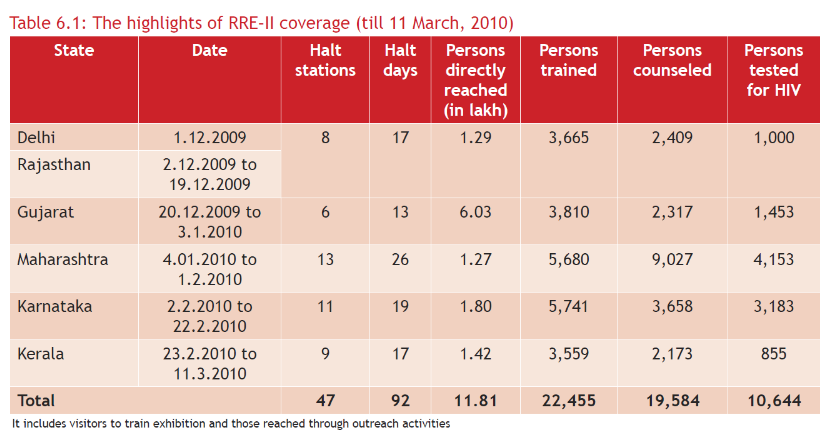

In [ ]:
from IPython.display import Image
Image('/content/camelot/background_lines.png')

In [ ]:
tables = camelot.read_pdf('background_lines.pdf', process_background=True)
tables[1].df

,0,1,2,3,4,5,6,7
0,State,Date,Halt \nstations,Halt \ndays,Persons \ndirectly \nreached\n(in lakh),Persons \ntrained,Persons \ncounseled,Persons \ntested\nfor HIV
1,Delhi,1.12.2009,8,17,1.29,"3,665","2,409","1,000"
2,Rajasthan,2.12.2009 to \n19.12.2009,,,,,,
3,Gujarat,20.12.2009 to \n3.1.2010,6,13,6.03,"3,810","2,317","1,453"
4,Maharashtra,4.01.2010 to \n1.2.2010,13,26,1.27,"5,680","9,027","4,153"
5,Karnataka,2.2.2010 to \n22.2.2010,11,19,1.80,"5,741","3,658","3,183"
6,Kerala,23.2.2010 to \n11.3.2010,9,17,1.42,"3,559","2,173",855
7,Total,,47,92,11.81,"22,455","19,584","10,644"


### Debugging with plots

We have text, line, contour, grid, joint kinds of plots to debug the outputs of parsing and locate any misclassified tables

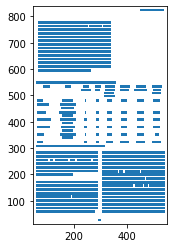

In [ ]:
camelot.plot(tables[1], kind='text').show()

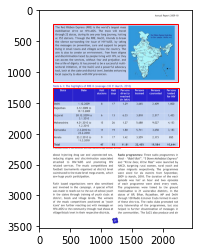

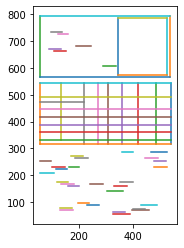

In [ ]:
camelot.plot(tables[1], kind='contour').show()
camelot.plot(tables[1], kind='line').show()

### Remove unwanted characters

In [ ]:
files.upload()

In [ ]:
tables = camelot.read_pdf("/content/camelot/pdf_with_unwanted_extra_stuff.pdf", flavor='stream', strip_text=".\n")
tables[0].df

,0,1,2,3,4,5,6,7,8,9
0,Program Represents arrests reported (not charg...,,,,,,,,,
1,by the FBI Some persons may be arrested more t...,,,,,,,,,
2,could represent multiple arrests of the same p...,,,,,,,,,
3,,,Total,,,Male,,,Female,
4,Offense charged,,Under 18,18 years,,Under 18,18 years,,Under 18,18 years
5,,Total,years,and over,Total,years,and over,Total,years,and over
6,Total,"11,062 6","1,540 0","9,522 6","8,263 3","1,071 6","7,191 7","2,799 2",468 3,"2,330 9"
7,Violent crime,467 9,69 1,398 8,380 2,56 5,323 7,87 7,12 6,75 2
8,Murder and nonnegligent,,,,,,,,,
9,manslaughter,100,09,91,90,09,81,11,–,10


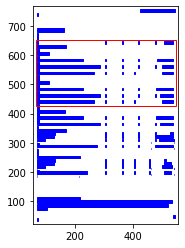

In [ ]:
tables = camelot.read_pdf('/content/camelot/where_camelot_fails.pdf', flavor='stream')
camelot.plot(tables[0], kind="contour").show()

## Improve/tweak table detection

On the example, above, small red rectangle is the area detected for the guessed table with the default of edge_tol=50 parameter. When we increase the parameter to 500, we get the full page as the table which is an increased guessed table area.

### Edge tool 

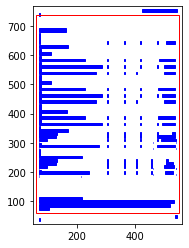

In [ ]:
tables = camelot.read_pdf('/content/camelot/where_camelot_fails.pdf', flavor='stream', edge_tol=500)
camelot.plot(tables[0], kind="contour").show()

### Detect shorter lines

Detection of shorter lines are made by using the factor of the page scales with a scaling_factor. Default is 15 and if we make is more than 100, even texts can be detected as lines 

In [ ]:
files.upload()

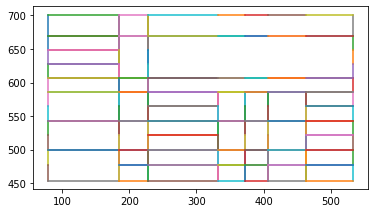

In [ ]:
# Small lines of headers are note recognized
tables = camelot.read_pdf("/content/camelot/short_lines.pdf", flavor='lattice')
camelot.plot(tables[0], kind='grid').show()

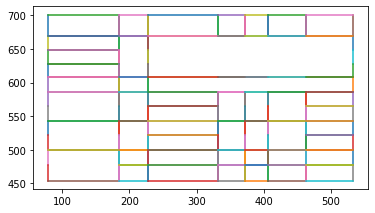

In [ ]:
# Obvious improvement on line_scale=40 about small lines on headers
tables = camelot.read_pdf("/content/camelot/short_lines.pdf", flavor='lattice', line_scale=40)
camelot.plot(tables[0], kind='grid').show()

## Custom image conversion back-end

Currently, we have back-ends from ghostscript and popler for image conversion. While we are not relying on ghostscript, rather pdf2image, you can write your own back-end as well.

In [ ]:
class ConversionBackend(object):
    def convert(pdf_path, png_path):
        # read pdf page from pdf_path
        # convert pdf page to image
        # write image to png_path
        pass
# tables = camelot.read_pdf(filename, backend=ConversionBackend())